In [5]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
#treinando dados

df_FaultFree = pyreadr.read_r(r'TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'TEP_Faulty_Training.RData')['faulty_training']

In [8]:
DF = pd.concat([df_FaultFree,df_Faulty])
DF.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.0,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.0,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.0,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.0,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.0,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


### Scale the dataset

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

sc.fit(df_FaultFree.iloc[:,3:])

StandardScaler()

### Select a subset of the Entire Dataset

In [10]:
# Select a subset of the data from simulation runs 1 to 10, and filter out fault numbers 9 and 15

reduce_data = DF.loc[(DF['simulationRun'] >=1) & (DF['simulationRun'] <=10)]
reduce_data = reduce_data[reduce_data['faultNumber'] != 9]
reduce_data = reduce_data[reduce_data['faultNumber'] != 15]

# Apply scaling transformation to selected features of the filtered dataset
X = sc.transform(reduce_data[reduce_data['sample'] > 20 ].iloc[:,3:])

# Extract the fault numbers that occur after the 20th sample
Y = reduce_data[reduce_data['sample'] > 20]['faultNumber'].values

### Add a random number coloumn to X as a control feature

In [11]:
# control_col = np.random.random(len(x)).reshape(-1,1)
# x = np.hstack((x,control_col))

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
x_train.shape

(72960, 52)

### Train the Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
LogRegCls = LogisticRegression(max_iter=1000,random_state=0,multi_class='ovr').fit(x_train,y_train)

In [17]:
LogRegCls.score(x_test,y_test)

0.5582236842105263

In [18]:
LogRegCls.coef_.shape

(19, 52)

In [20]:
feature_importance = LogRegCls.coef_
feature_name = np.array(reduce_data.columns[3:])
# feature_name = np.append(feature_name, "control_feature")

coeff_df = pd.DataFrame(data = feature_importance,columns=feature_name)

In [21]:
coeff_df

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.338078,-0.018675,-0.059292,-0.064939,0.033841,0.000467,-2.995206,0.008208,0.123238,-0.128446,...,-0.080019,-0.507299,-0.166208,-0.137435,0.066855,0.004365,0.000005,-0.290241,-0.122573,-1.196584
1,0.929715,0.004726,-0.003632,-0.398673,-0.177261,-0.356436,-3.180569,-0.331279,0.042640,-0.776235,...,-0.140752,-0.227128,-0.135247,-0.372466,0.697322,0.113544,0.069148,-0.706826,-0.126679,-1.899162
2,0.570488,-0.130323,-0.175030,-0.190601,-0.026585,0.195696,-0.374109,-0.195004,0.088727,-0.439894,...,-0.146172,-0.708177,-0.107328,-0.103510,0.423241,0.092247,0.020788,-0.814631,-0.107245,-0.687916
3,0.289737,-0.020763,-0.058050,-0.064514,0.032914,-0.014068,-2.629476,0.002413,0.104148,-0.087984,...,-0.068683,-0.458455,-0.167627,-0.123526,0.024615,0.001595,-0.000888,-0.289749,-0.102530,-1.191005
4,2.690348,-0.117898,-0.041012,-0.144114,0.044391,0.012231,-2.982232,-0.007049,-0.474544,-0.490433,...,-0.109950,-2.823707,-0.135111,-0.297399,0.410259,0.007354,0.011926,-0.179078,0.686510,-0.730375
5,5.698748,0.135756,0.133905,-0.232812,-0.066263,0.072026,-2.375874,0.209695,0.149659,-1.480267,...,-0.325778,-5.832944,-0.284276,0.065622,1.418679,-0.008692,-0.011156,-0.541960,-0.230373,5.945003
6,-1.995601,0.120142,0.004938,0.171054,0.029661,0.106065,-0.880127,-0.096650,0.103150,0.385737,...,-0.642574,1.353944,-0.775818,0.123446,-0.589045,0.025171,-0.042827,-1.002466,-0.087872,-0.431062
7,2.508540,0.666861,0.493006,-0.636923,0.044894,0.082791,-0.850029,0.457720,0.285203,-1.275105,...,-0.376704,-2.596023,2.603160,-0.615033,1.125388,0.056502,-0.031057,-1.050751,-0.188821,-0.986087
8,0.854378,-0.043431,0.035943,-0.016579,0.022897,0.036032,-1.958335,0.227650,0.120860,0.336302,...,0.013222,-0.923290,-0.164728,0.050450,-0.351347,-0.006718,0.001594,0.287479,-0.118998,-1.596404
9,0.390242,-0.039224,-0.059963,-0.082148,0.044663,-0.013301,-3.088401,-0.004004,0.126976,-0.095730,...,-0.059391,-0.567478,-0.179732,-0.124768,0.034522,0.005371,-0.010466,-0.198740,-0.126038,-1.210651


### Feature Importance for each fault type

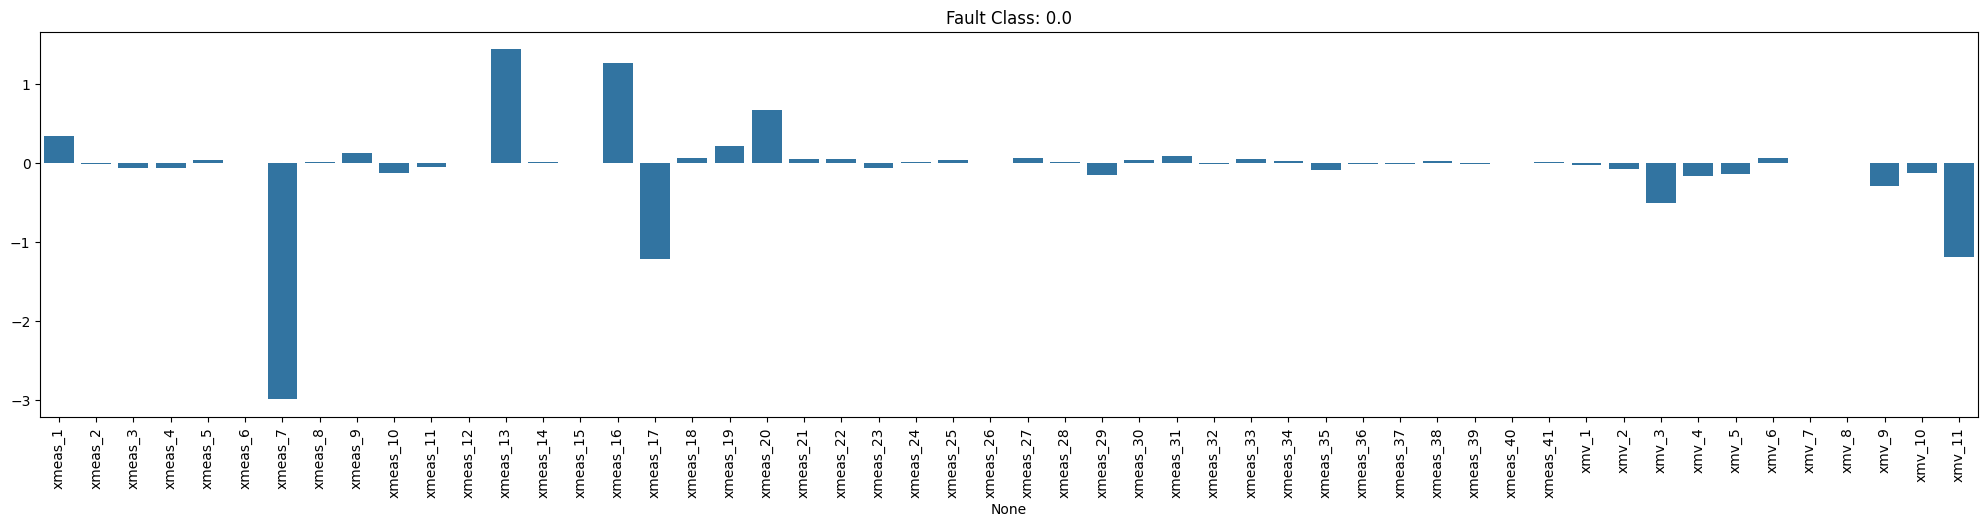

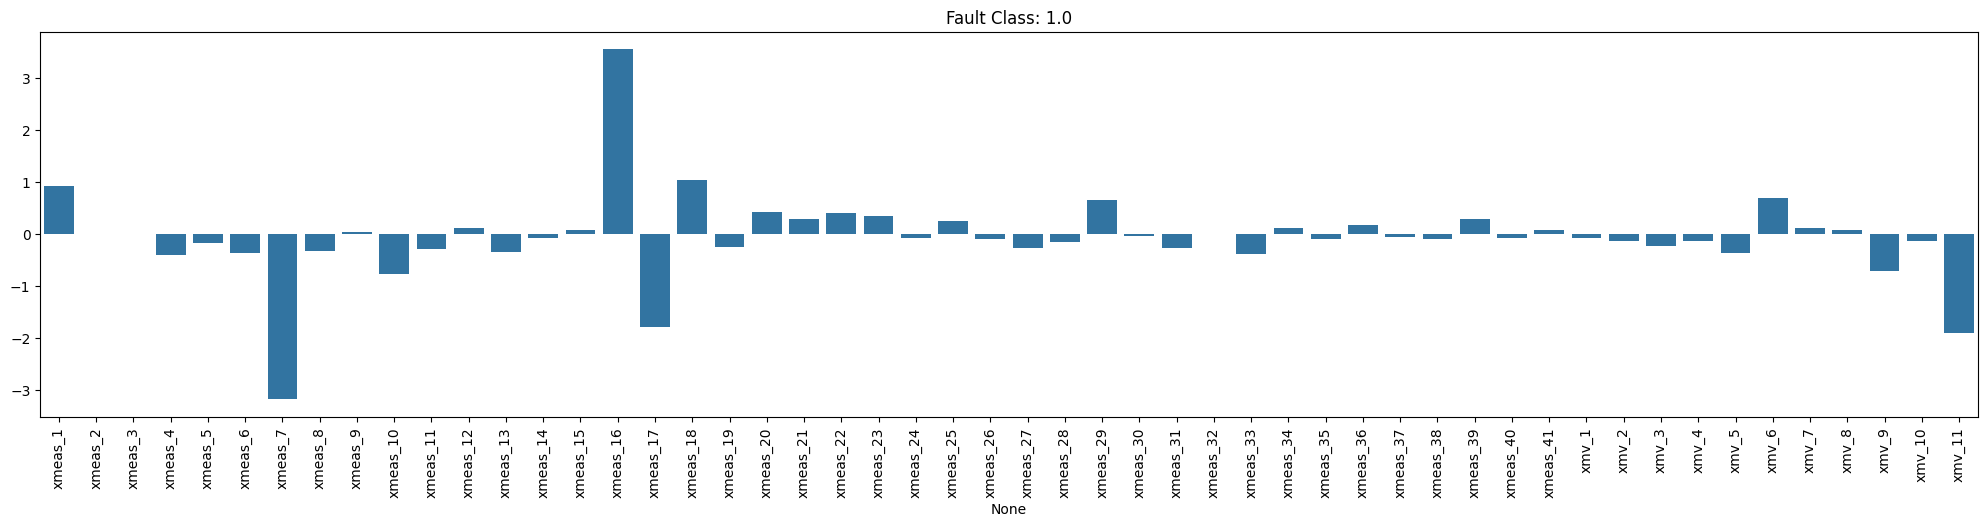

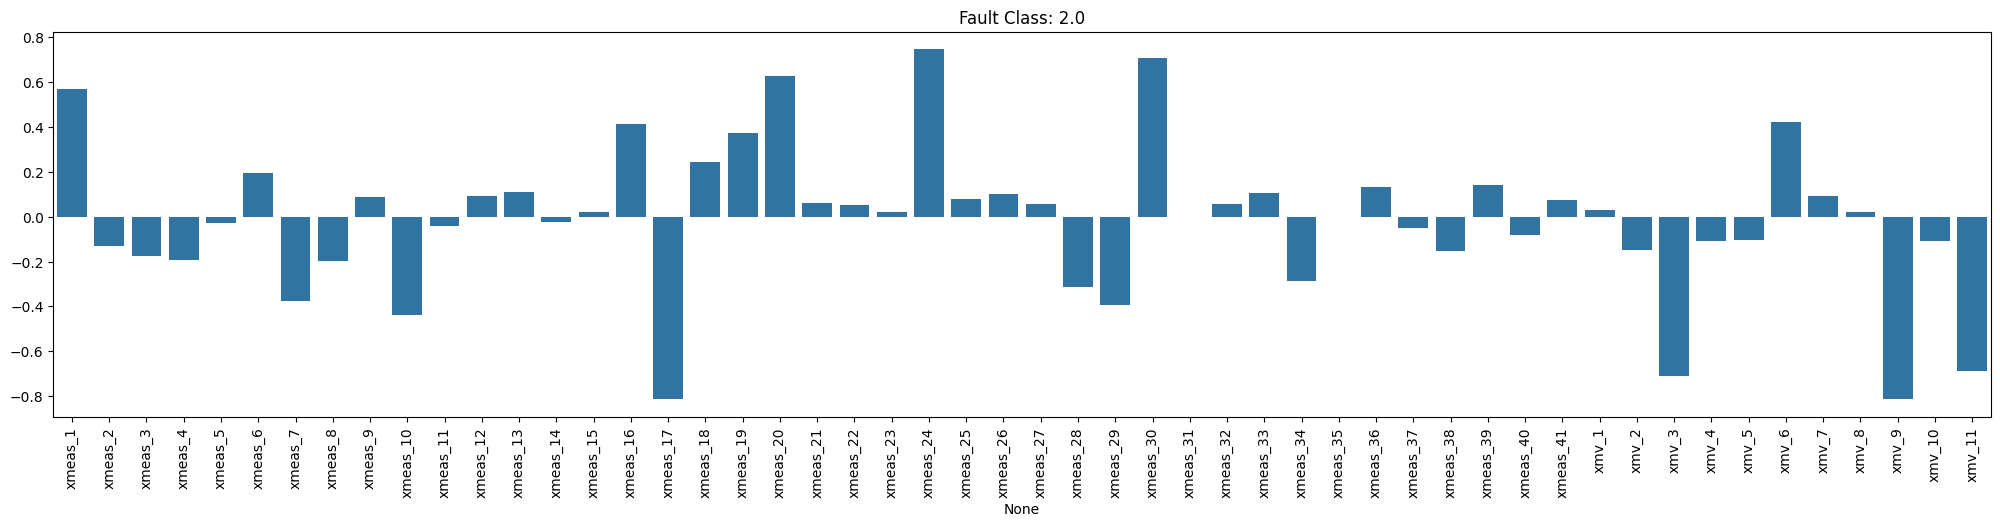

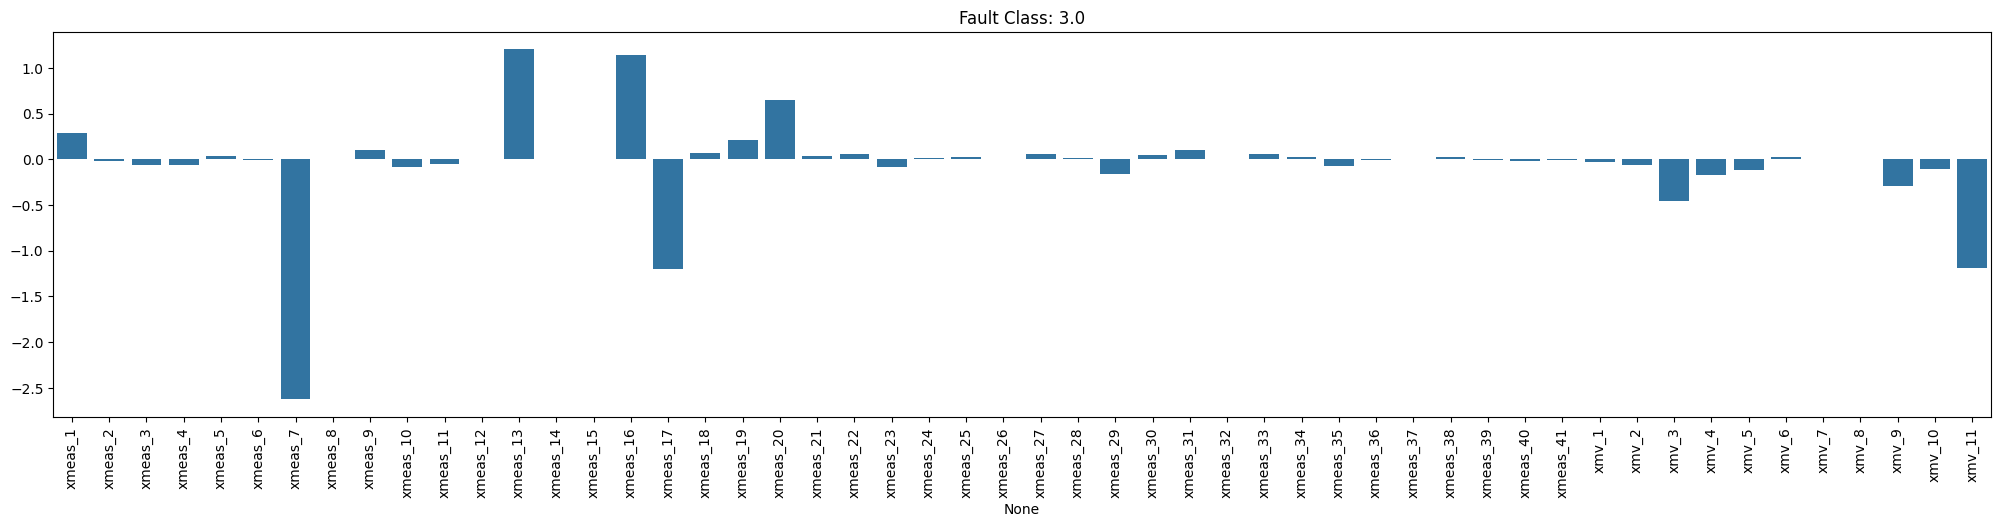

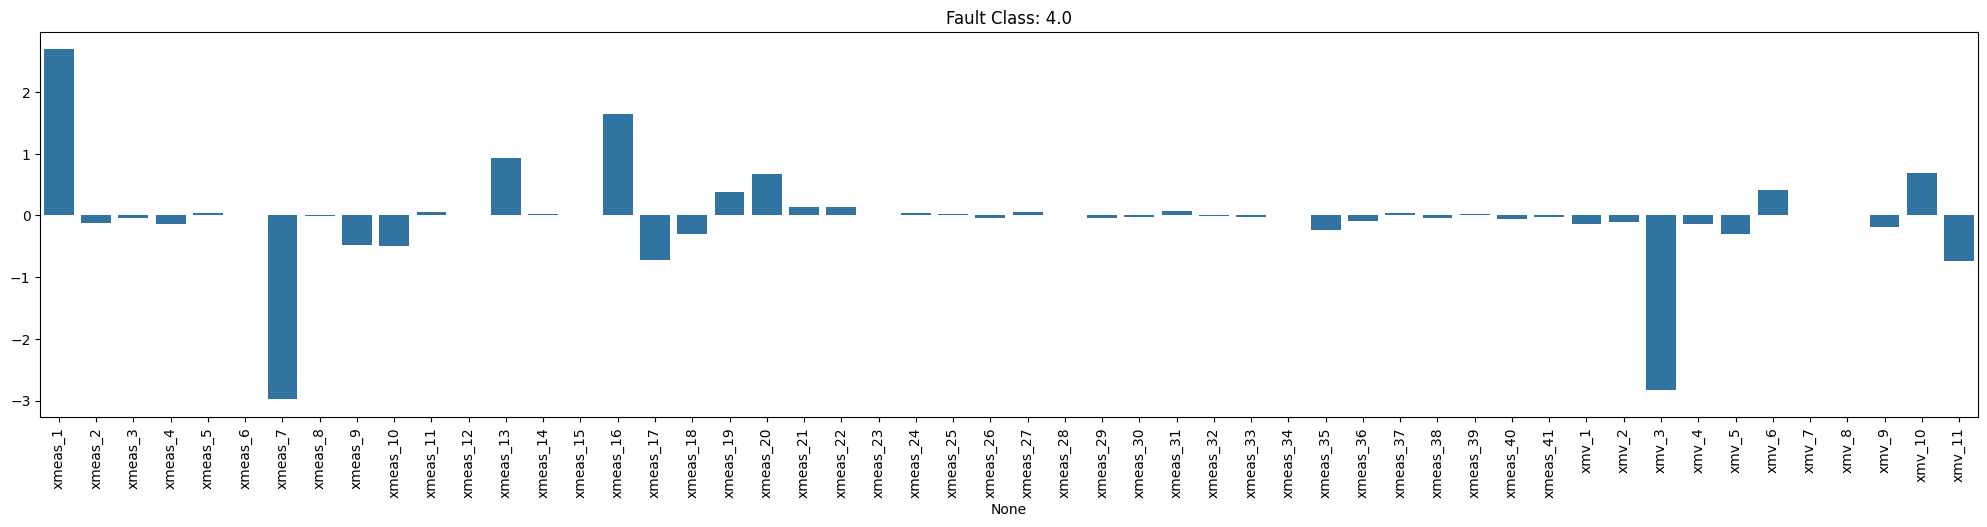

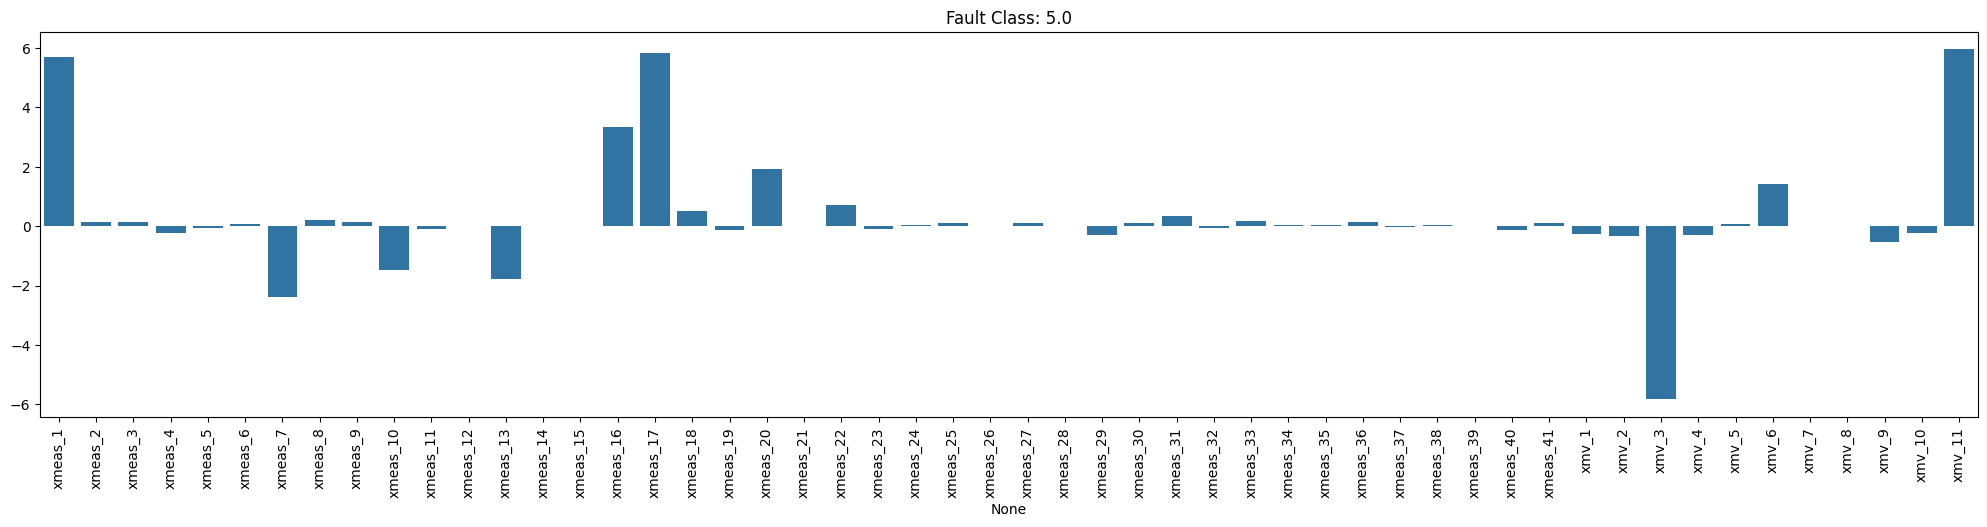

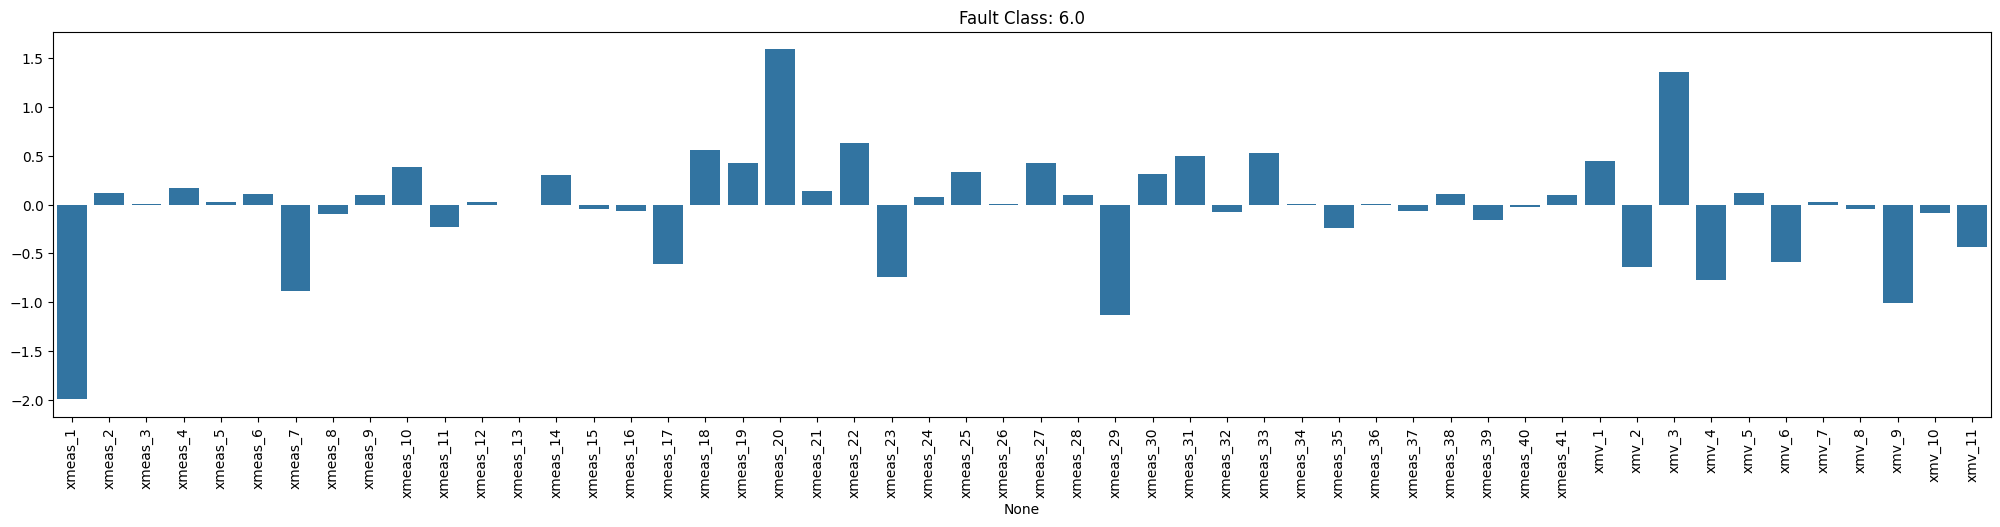

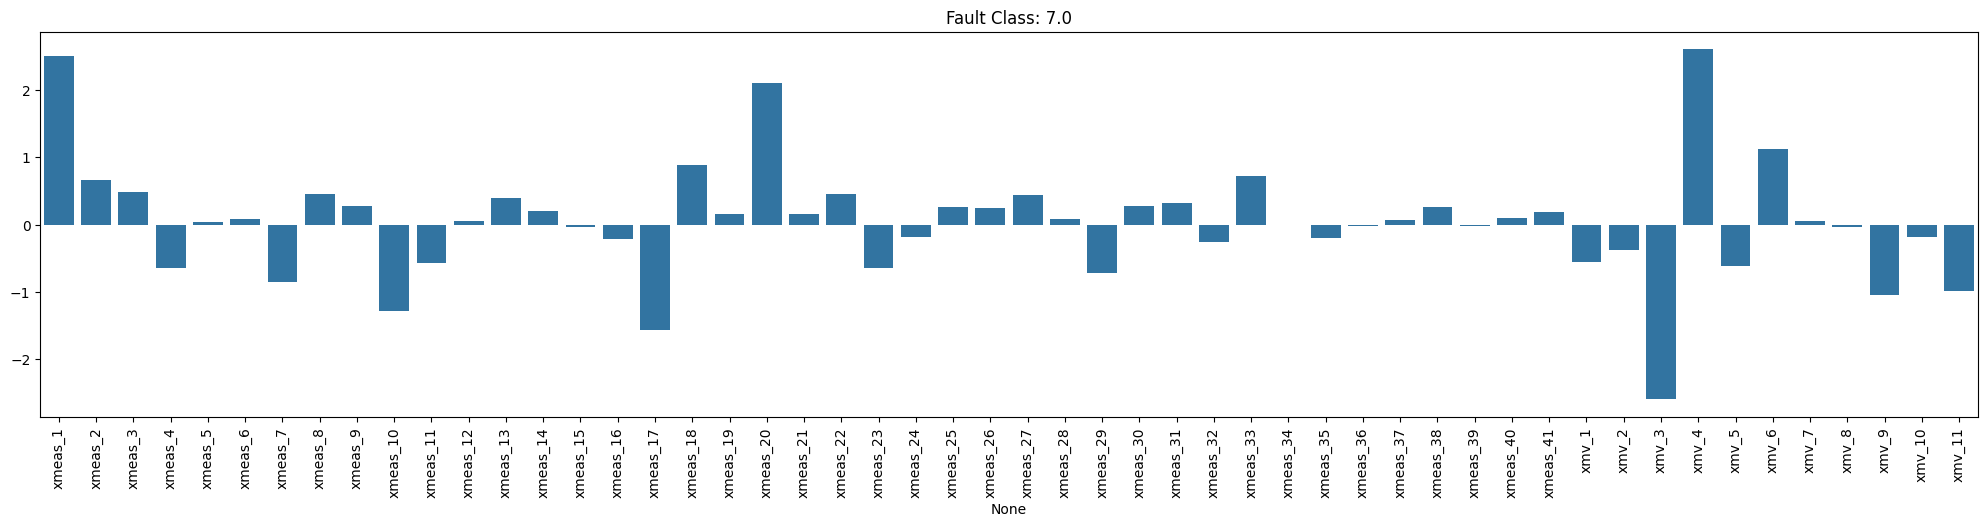

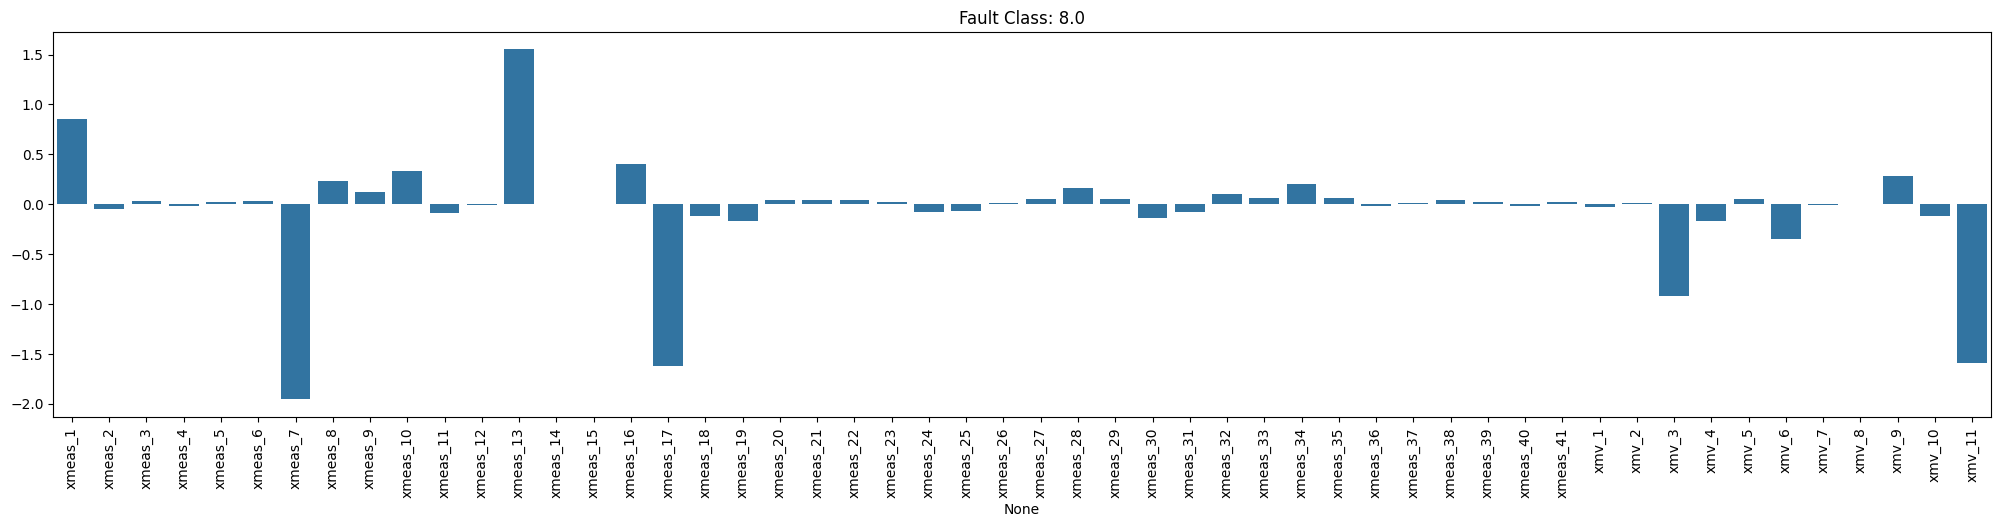

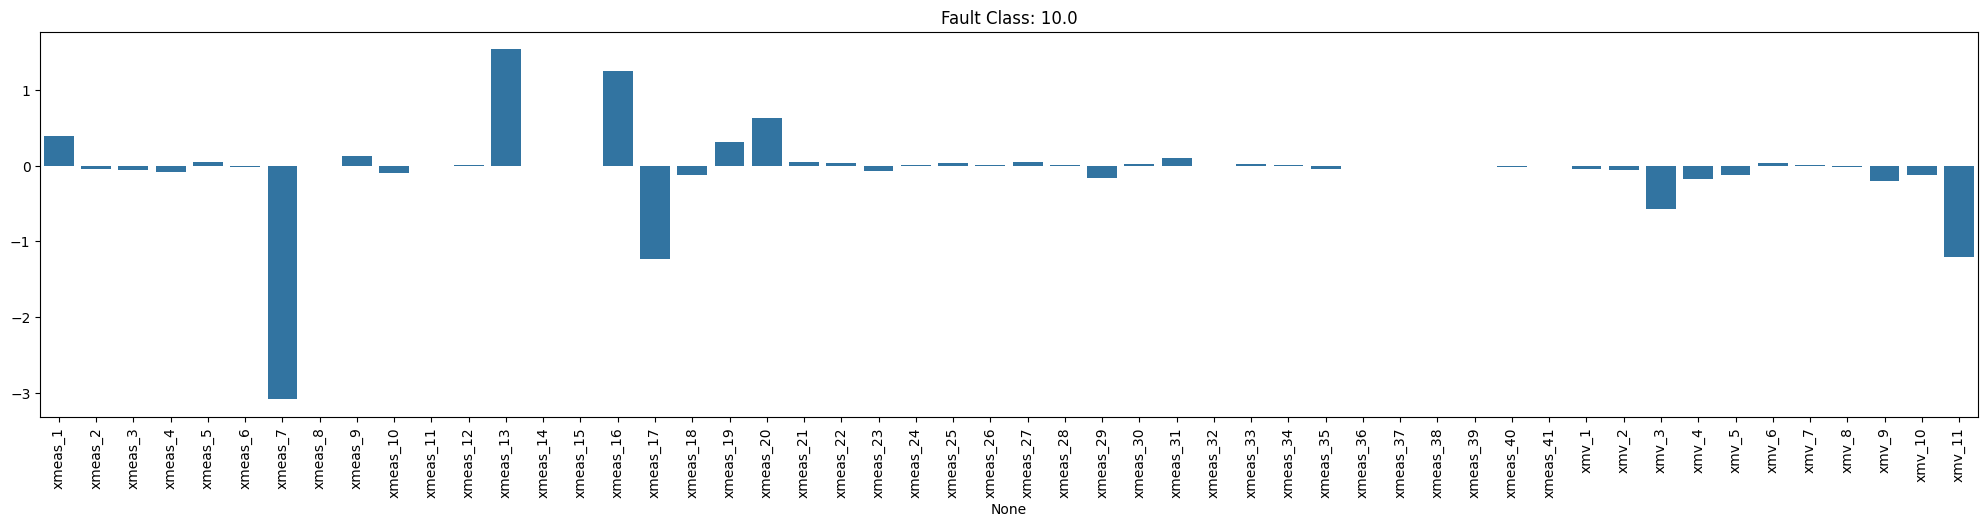

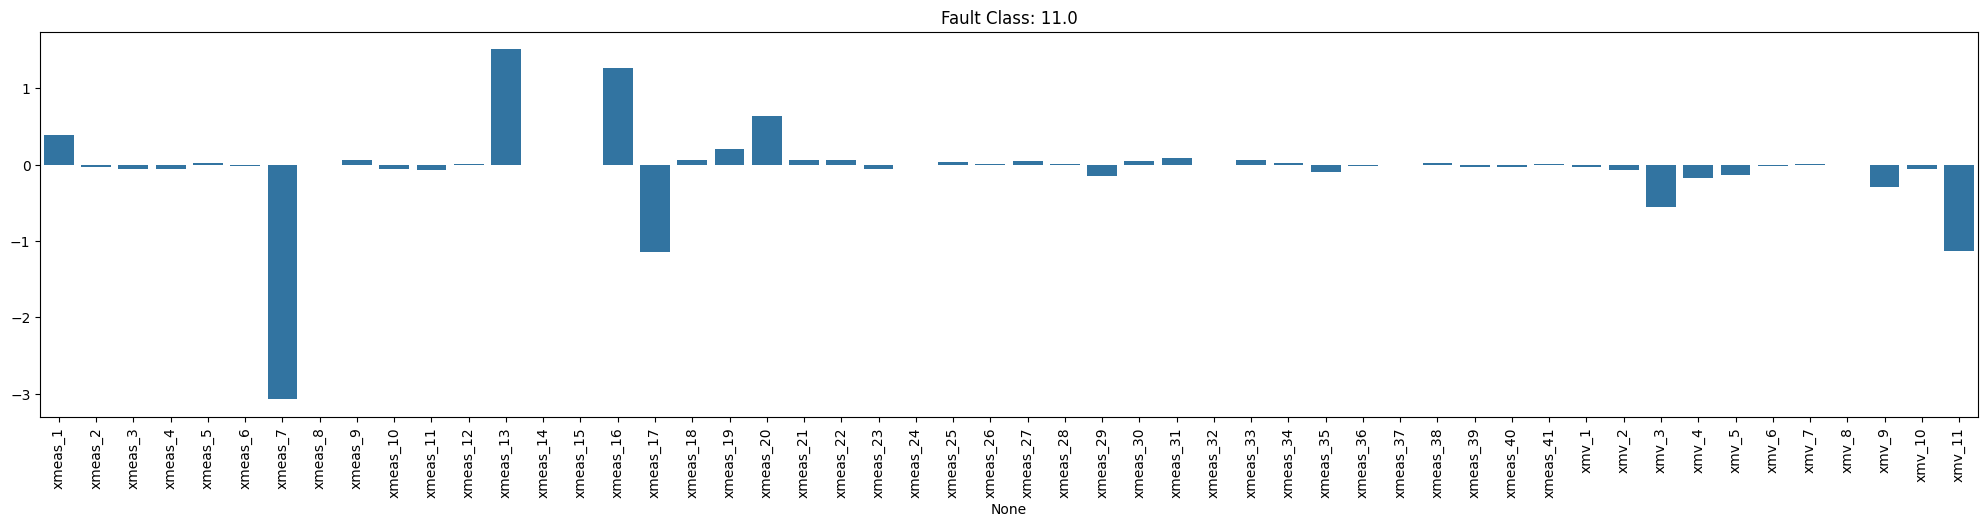

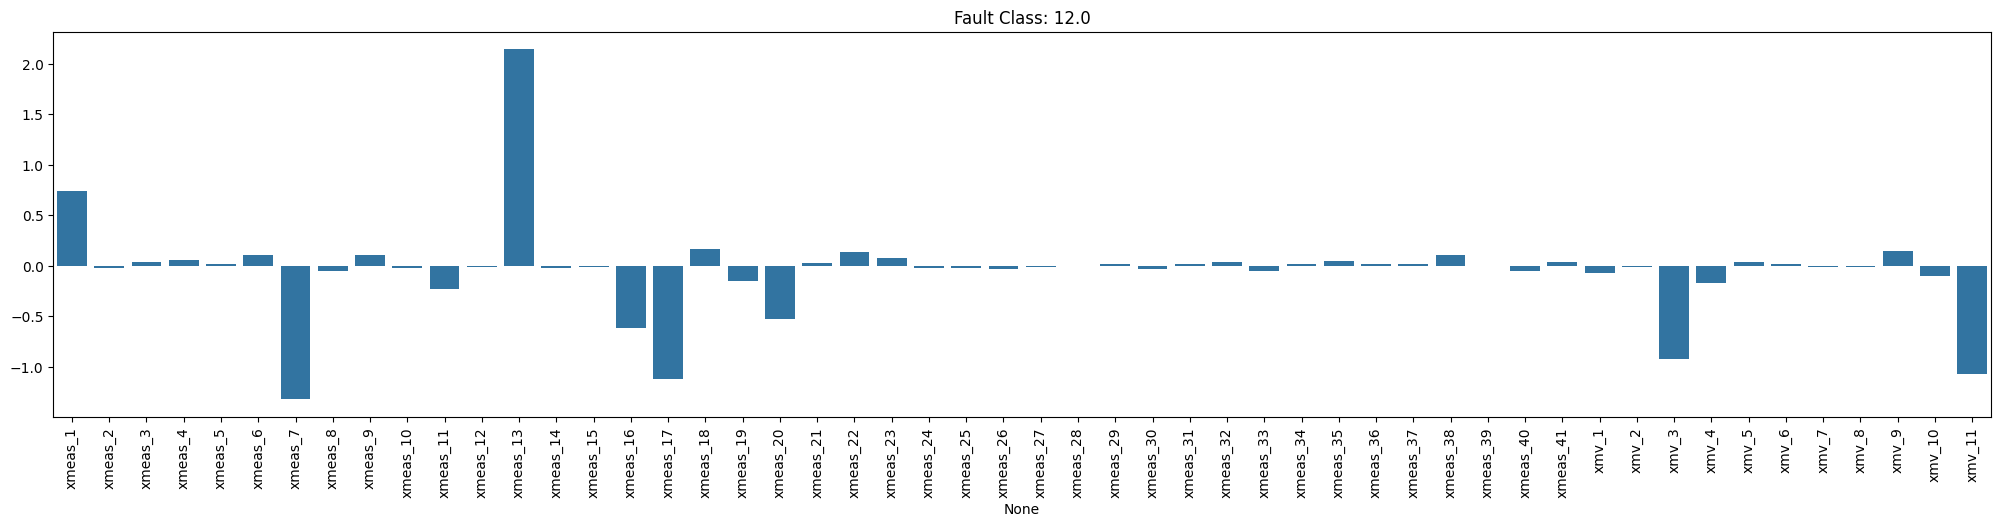

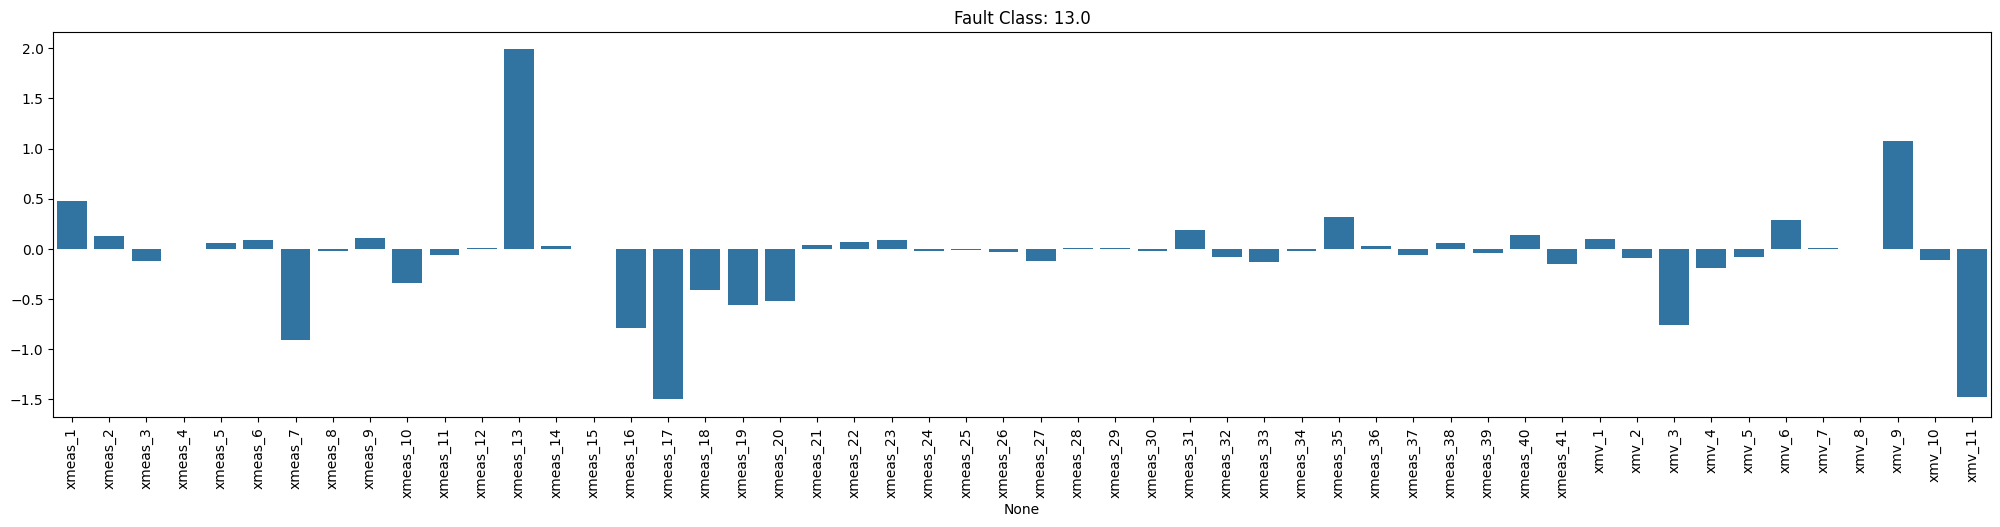

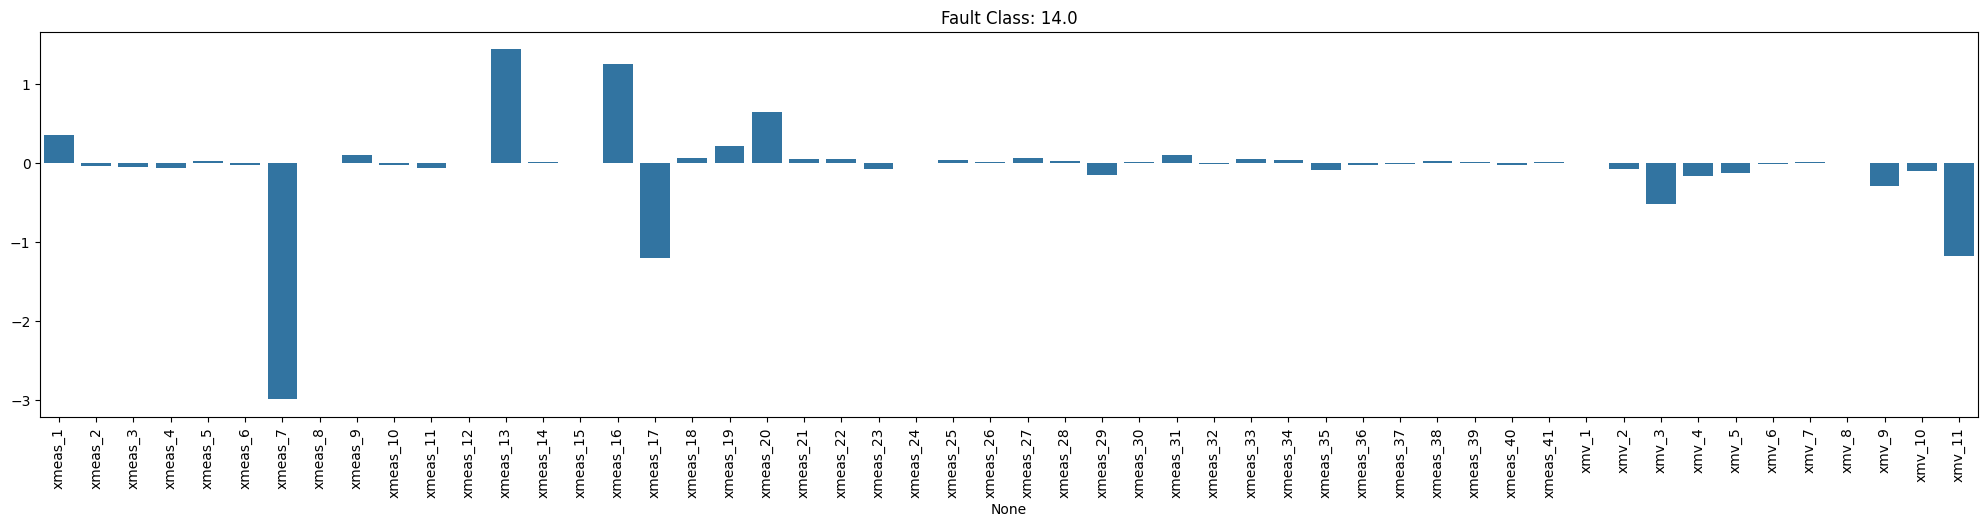

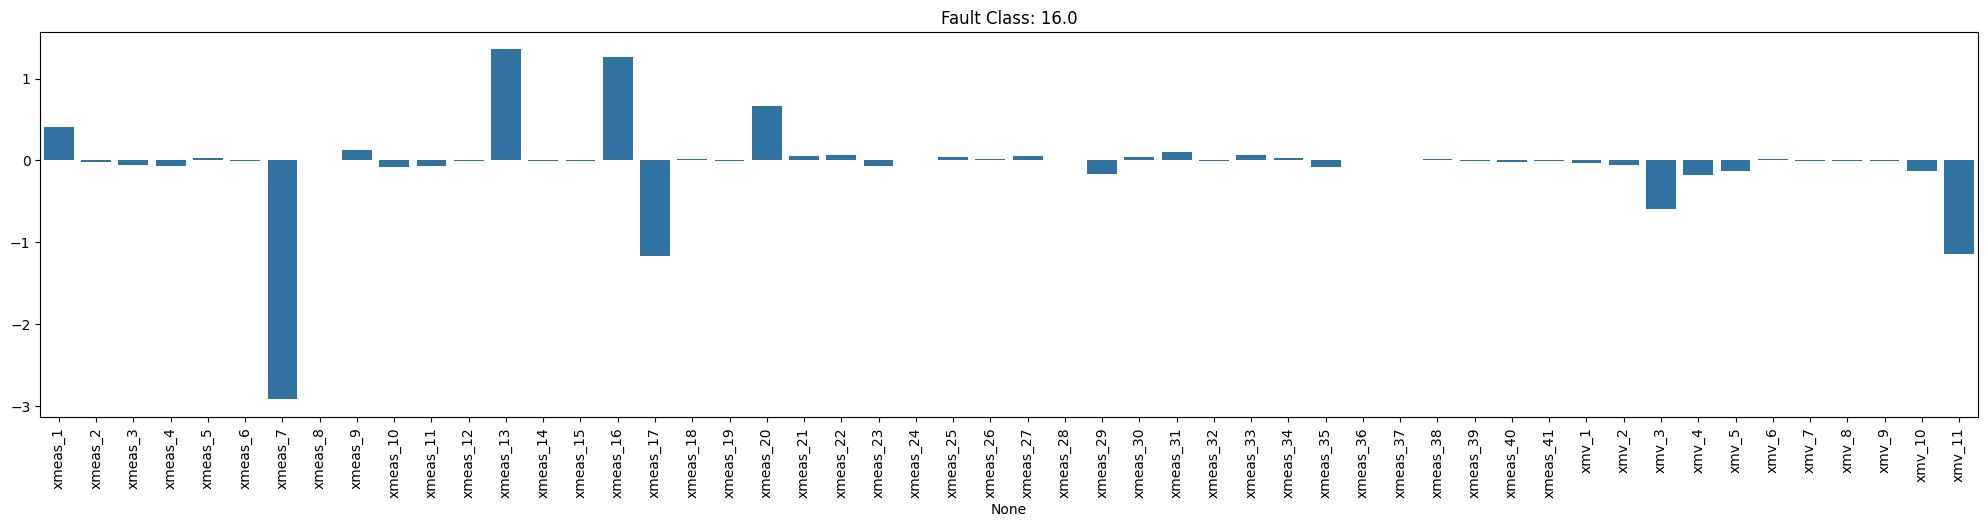

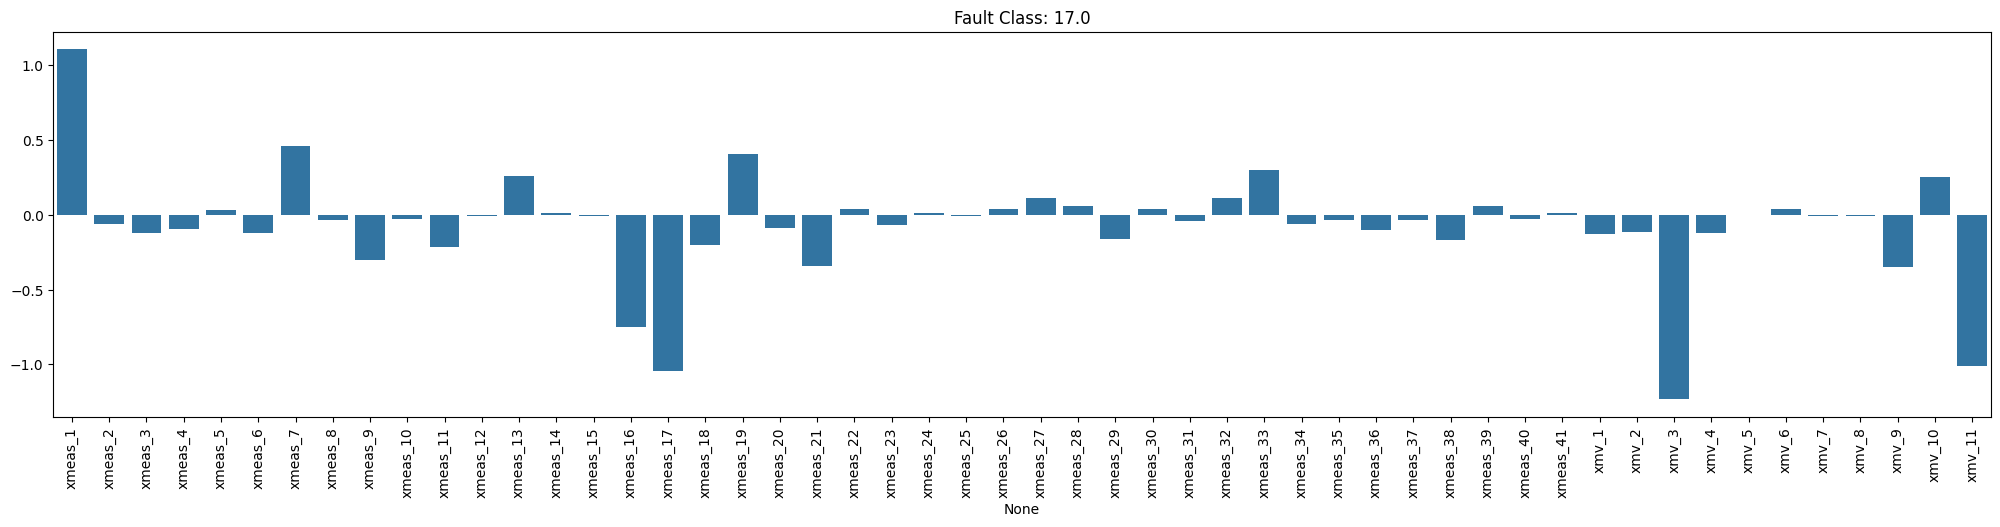

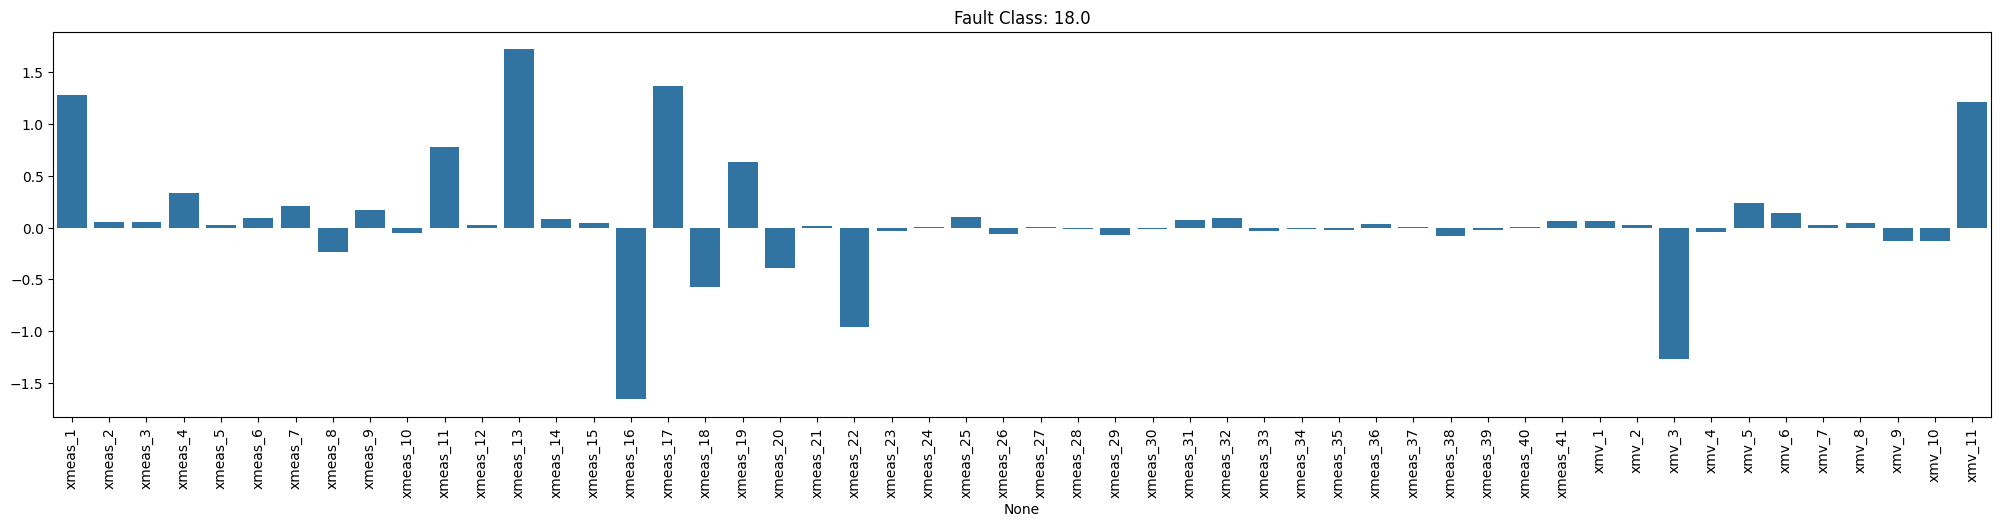

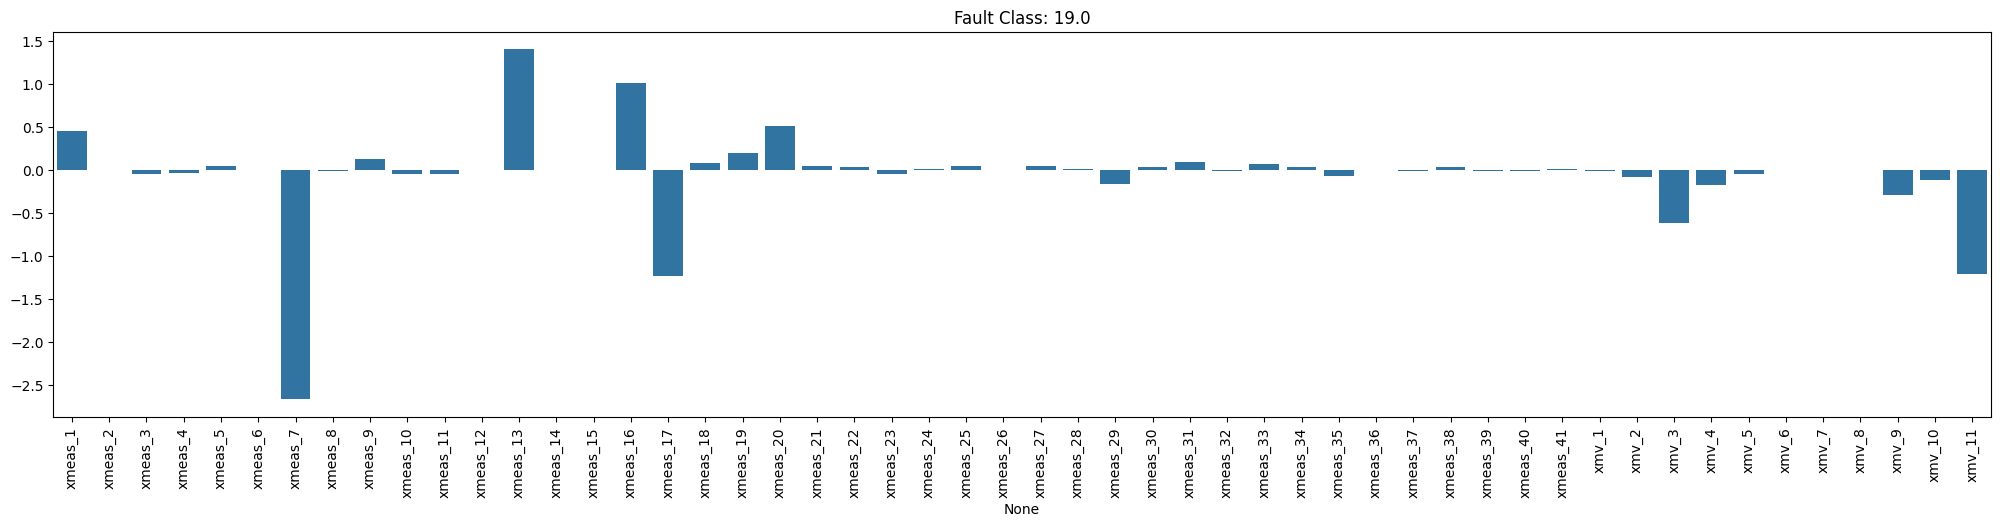

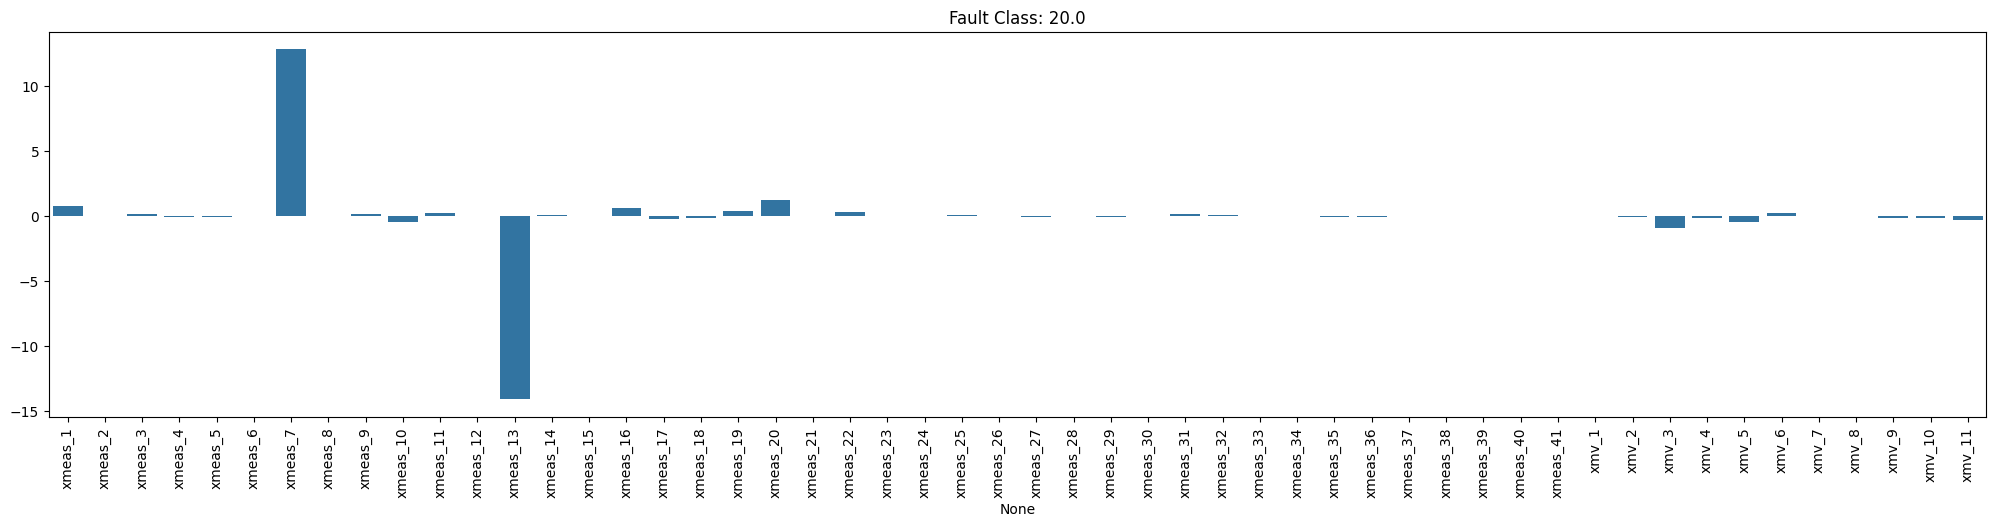

In [22]:
#Create a barplots for each row of the DataFrame

for i in range(len(coeff_df)):
    row_data = coeff_df.iloc[i]
    plt.figure(figsize=(25,5))
    sns.barplot(x=row_data.index,y=row_data.values)
    plt.title(f"Fault Class: {LogRegCls.classes_[i]}")
    plt.xticks(rotation=90)
    plt.show()

### Combined feature importance of all the Fault classes

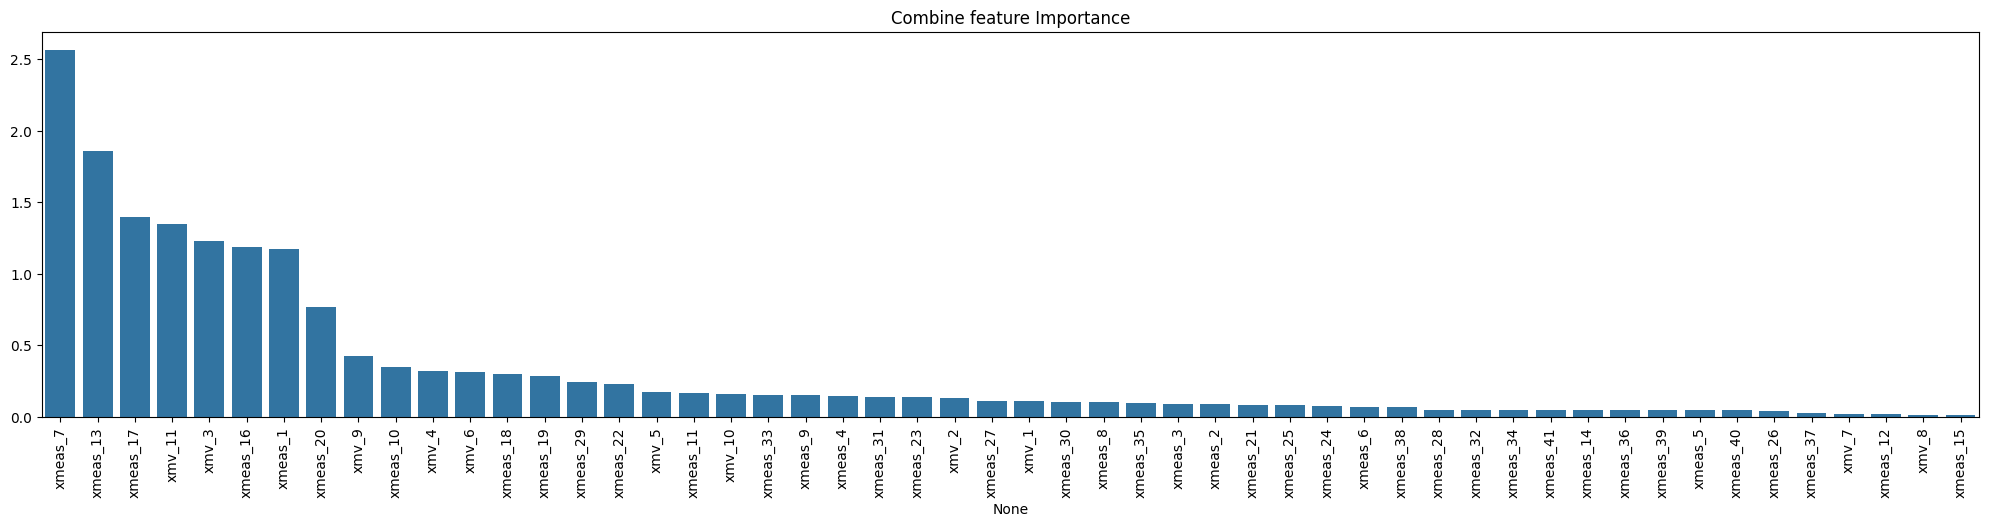

In [25]:
row_data = coeff_df.abs().mean()
row_data = row_data.sort_values(ascending=False)

plt.figure(figsize=(25,5))
sns.barplot(x=row_data.index,y=row_data.values)
plt.title(f"Combine feature Importance")
plt.xticks(rotation=90)
plt.show()

### Train The Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0,max_depth=50)

In [27]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [28]:
DT.score(x_train,y_train)

0.9212171052631579

In [29]:
DT.score(x_test,y_test)

0.7683114035087719

In [30]:
#get feature importance
importances = DT.feature_importances_
feature_name = np.array(reduce_data.columns[3:])
#feature_name = np.append(feature_name,"control_feature")

#Create a DataFrame from the two arrays
feature_importance = pd.DataFrame({'feature_name': feature_name, 'importances':importances})

#Sort the DataFrame by importances in descending order
feature_importance = feature_importance.sort_values('importances',ascending=False)

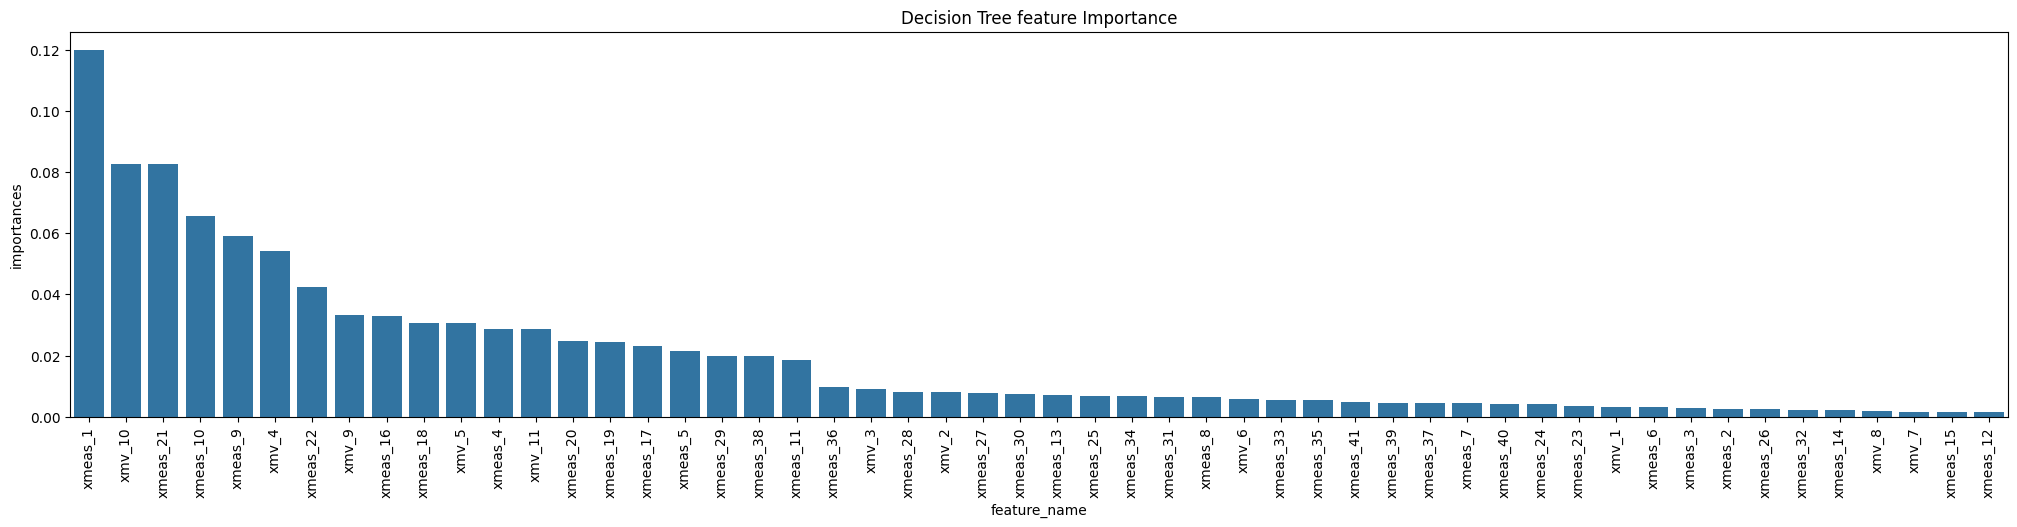

In [32]:
plt.figure(figsize=(25,5))
sns.barplot(x=feature_importance.feature_name, y=feature_importance.importances)
plt.title(f"Decision Tree feature Importance")
plt.xticks(rotation=90)
plt.show()

#### Visualize The Decision Tree as a bunch of if... Else rule structure

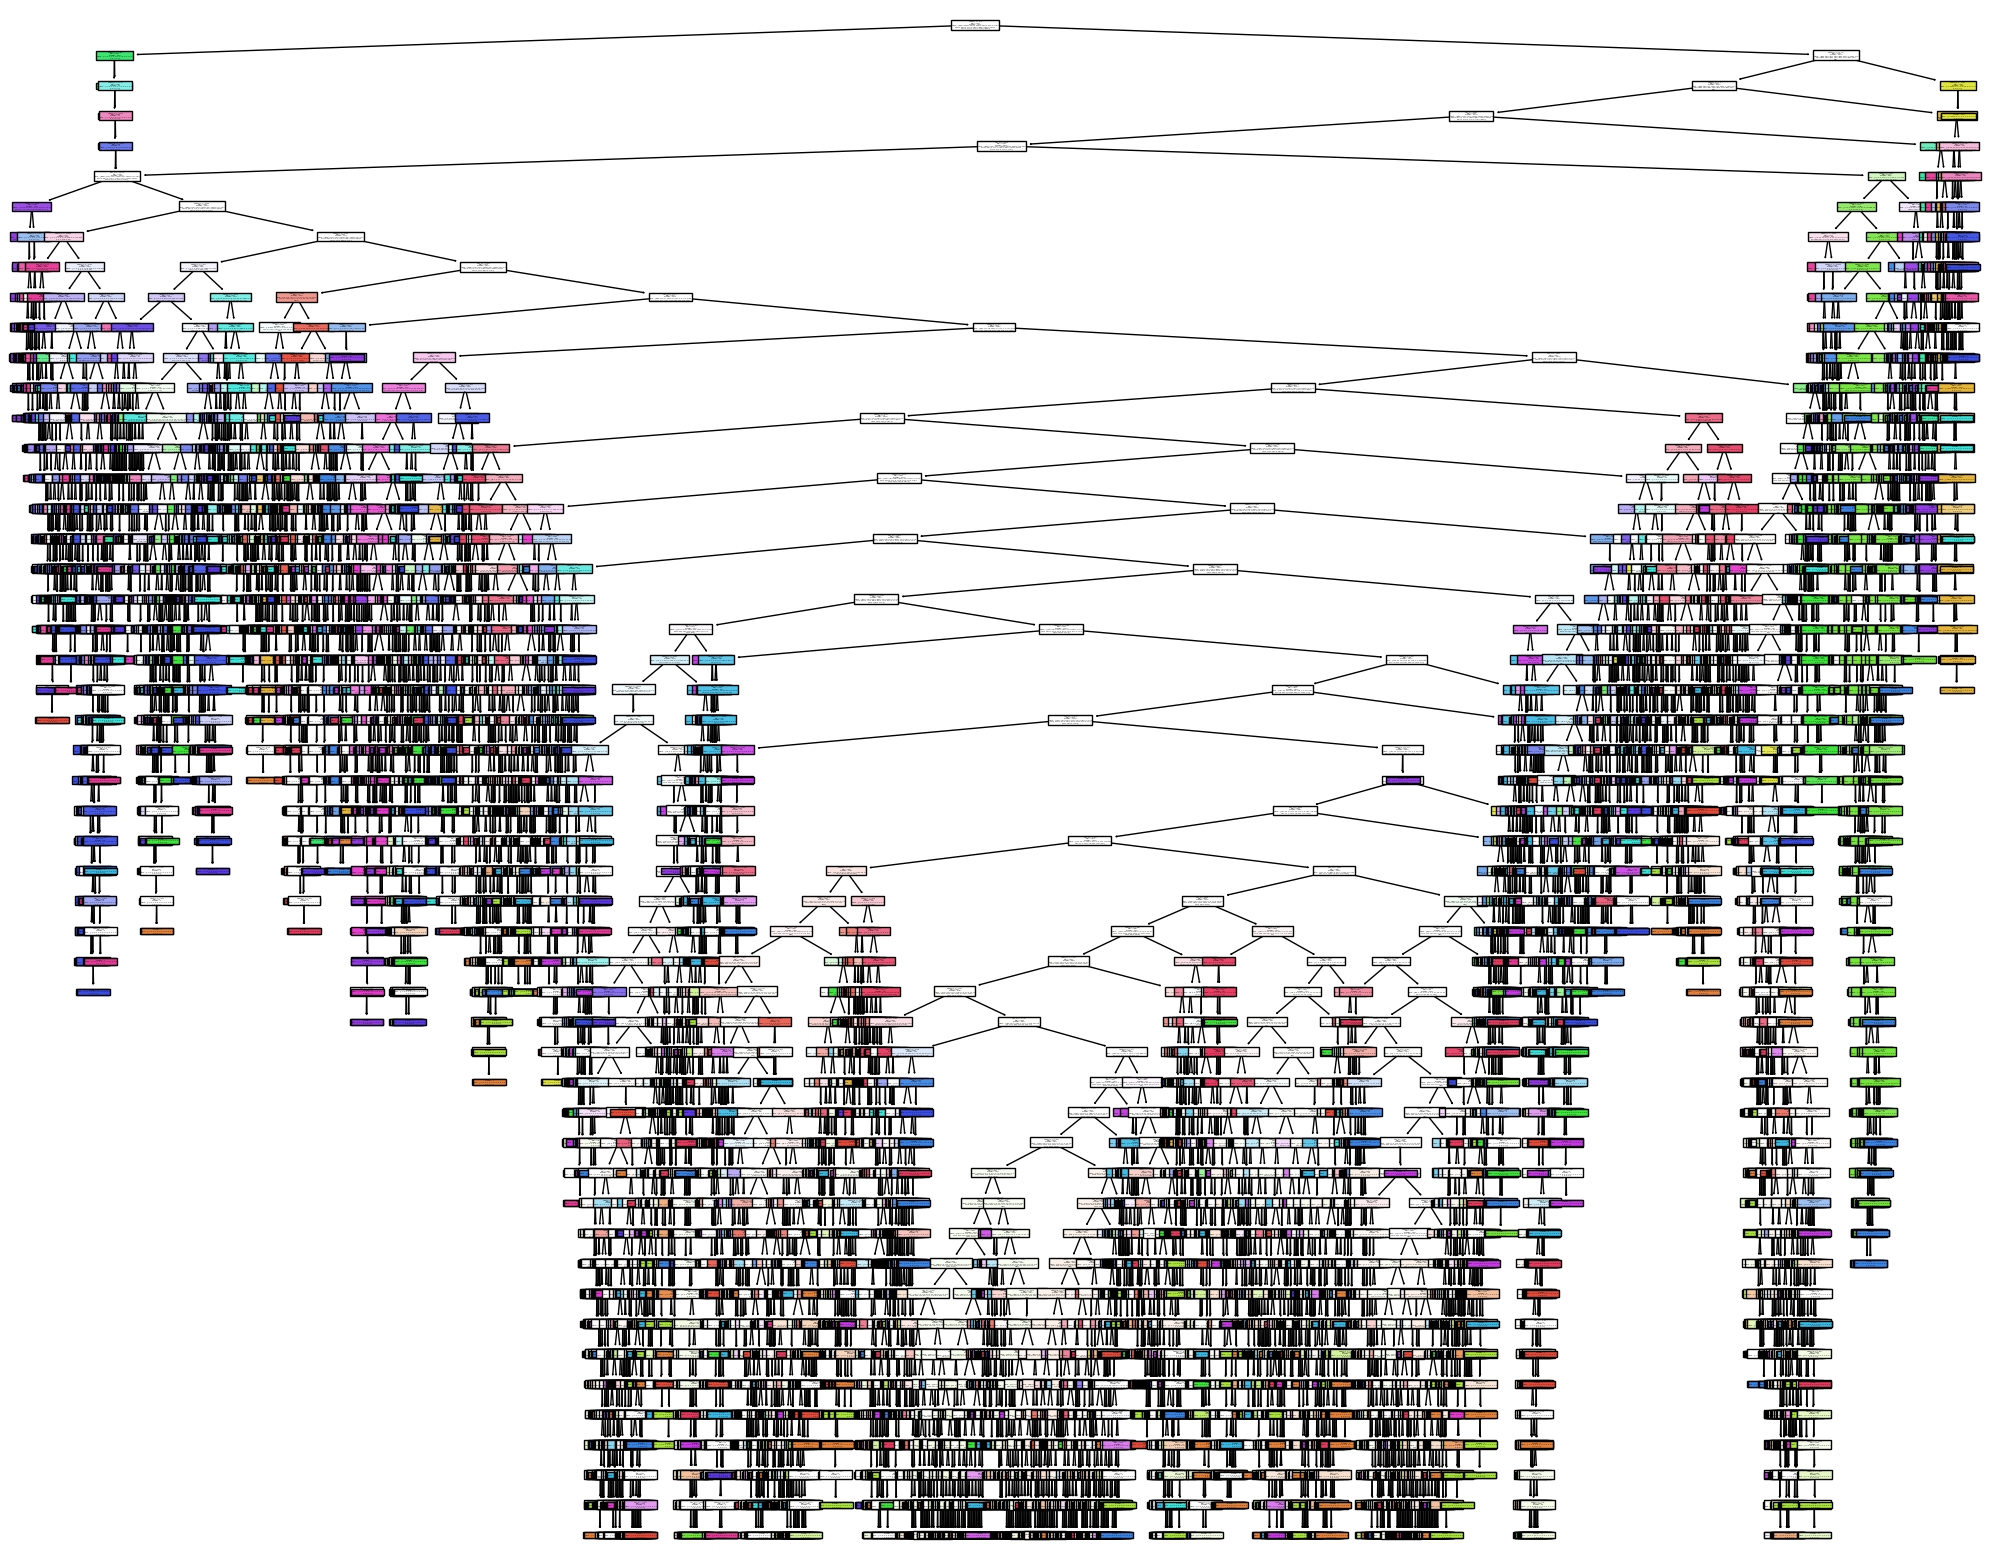

In [34]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT,
                   feature_names=reduce_data.columns[3:],
                   filled=True)